Reading and Understanding Data

In [ ]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
# Reading the data on which analysis needs to be done

sgr = pd.read_csv('2003_2017_waste.csv', sep=",", encoding="ISO-8859-1", header=0)
sgr.head()

,waste_type,waste_disposed_of_tonne,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
0,Food,679900,111100.0,791000,0.14,2016
1,Paper/Cardboard,576000,607100.0,1183100,0.51,2016
2,Plastics,762700,59500.0,822200,0.07,2016
3,C&D,9700,1585700.0,1595400,0.99,2016
4,Horticultural waste,111500,209000.0,320500,0.65,2016


In [ ]:
sgr.tail

<bound method NDFrame.tail of                                  waste_type  ...  year
0                                      Food  ...  2016
1                           Paper/Cardboard  ...  2016
2                                  Plastics  ...  2016
3                                       C&D  ...  2016
4                       Horticultural waste  ...  2016
..                                      ...  ...   ...
220                          Ash and sludge  ...  2017
221                                 Plastic  ...  2017
222                         Textile/Leather  ...  2017
223  Others (stones, ceramic, rubber, etc.)  ...  2017
224                                   Total  ...  2017

[225 rows x 6 columns]>

In [ ]:
# shape of df

sgr.shape

(225, 6)

In [ ]:
# df info

sgr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   waste_type                   225 non-null    object 
 1   waste_disposed_of_tonne      225 non-null    int64  
 2   total_waste_recycled_tonne   225 non-null    float64
 3   total_waste_generated_tonne  225 non-null    int64  
 4   recycling_rate               225 non-null    float64
 5   year                         225 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 10.7+ KB


In [ ]:
# df description

sgr.describe()

,waste_disposed_of_tonne,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000
mean,3.697191e+05,4.896987e+05,8.594173e+05,0.481778,2010.000000
std,6.842470e+05,9.607678e+05,1.579112e+06,0.365106,4.330127
min,1.300000e+03,0.000000e+00,1.440000e+04,0.000000,2003.000000
25%,2.460000e+04,1.830000e+04,1.184000e+05,0.110000,2006.000000
50%,1.062000e+05,9.110000e+04,3.324000e+05,0.490000,2010.000000
75%,5.000000e+05,5.200000e+05,8.098000e+05,0.850000,2014.000000
max,3.045200e+06,4.825900e+06,7.851500e+06,0.990000,2017.000000


 Data Cleansing

In [ ]:
# Calculating the Missing Values % contribution in DF

df_null = round(100*(sgr.isnull().sum())/len(sgr), 2)
df_null

waste_type                     0.0
waste_disposed_of_tonne        0.0
total_waste_recycled_tonne     0.0
total_waste_generated_tonne    0.0
recycling_rate                 0.0
year                           0.0
dtype: float64

In [ ]:
# Droping rows having missing values

sgr = sgr.dropna()
sgr.shape

(225, 6)

Data Preparation

In [ ]:
import random

x = 225
y = []

for i in range(x):
    list = ["dki jakarta", "diy", "jawa tengah", "jawa barat, banten, jawa timur, bali"]
    item = random.choice(list)
    y.append(item)

sgr["region"] = y
sgr.head()

,waste_type,waste_disposed_of_tonne,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year,region
0,Food,679900,111100.0,791000,0.14,2016,diy
1,Paper/Cardboard,576000,607100.0,1183100,0.51,2016,jawa tengah
2,Plastics,762700,59500.0,822200,0.07,2016,diy
3,C&D,9700,1585700.0,1595400,0.99,2016,dki jakarta
4,Horticultural waste,111500,209000.0,320500,0.65,2016,jawa tengah


In [ ]:
x = 225
y = []

for i in range(x):
    list = ["1982398216", "12873918273", "192837912783", "1298371027", "1298301297", "21098310", "10293071"]
    item = random.choice(list)
    y.append(item)

sgr["harga"] = y
sgr.head()

,waste_type,waste_disposed_of_tonne,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year,region,harga
0,Food,679900,111100.0,791000,0.14,2016,diy,1298371027
1,Paper/Cardboard,576000,607100.0,1183100,0.51,2016,jawa tengah,1298301297
2,Plastics,762700,59500.0,822200,0.07,2016,diy,192837912783
3,C&D,9700,1585700.0,1595400,0.99,2016,dki jakarta,12873918273
4,Horticultural waste,111500,209000.0,320500,0.65,2016,jawa tengah,192837912783


In [ ]:
x = 225
y = []

for i in range(x):
    item = random.randint(123155, 992349)
    y.append(item)

sgr["id"] = y
sgr.head()

,waste_type,waste_disposed_of_tonne,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year,region,harga,id
0,Food,679900,111100.0,791000,0.14,2016,diy,1298371027,804698
1,Paper/Cardboard,576000,607100.0,1183100,0.51,2016,jawa tengah,1298301297,153139
2,Plastics,762700,59500.0,822200,0.07,2016,diy,192837912783,533000
3,C&D,9700,1585700.0,1595400,0.99,2016,dki jakarta,12873918273,558068
4,Horticultural waste,111500,209000.0,320500,0.65,2016,jawa tengah,192837912783,757647


In [ ]:
# New Attribute : Monetary

sgr['non recycling rate'] = sgr['waste_disposed_of_tonne']/sgr['total_waste_generated_tonne']
rfm_m = sgr.groupby('waste_type')['non recycling rate'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,waste_type,non recycling rate
0,Ash & Sludge,2.600796
1,Ash and sludge,0.882498
2,C&D,0.020024
3,Construction Debris,0.316872
4,Construction debris,0.005841


In [ ]:
# New Attribute : Frequency

rfm_f = sgr.groupby('waste_type')['harga'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['waste_type', 'Frequency']
rfm_f.head()

,waste_type,Frequency
0,Ash & Sludge,3
1,Ash and sludge,1
2,C&D,3
3,Construction Debris,11
4,Construction debris,1


In [ ]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='waste_type', how='inner')
rfm.head()

,waste_type,non recycling rate,Frequency
0,Ash & Sludge,2.600796,3
1,Ash and sludge,0.882498,1
2,C&D,0.020024,3
3,Construction Debris,0.316872,11
4,Construction debris,0.005841,1


In [ ]:
# New Attribute : Recency


rfm_f = sgr.groupby('waste_type')['recycling_rate'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['waste_type', 'Recency']
rfm_f.head()

,waste_type,Recency
0,Ash & Sludge,3
1,Ash and sludge,1
2,C&D,3
3,Construction Debris,11
4,Construction debris,1


In [ ]:
# Compute the maximum date to know the last transaction date

max_date = max(sgr['year'])
max_date

2017

In [ ]:
# Compute the difference between max date and transaction date

sgr['Diff'] = max_date - sgr['year']
sgr.head()

,waste_type,waste_disposed_of_tonne,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year,region,harga,id,non recycling rate,Diff
0,Food,679900,111100.0,791000,0.14,2016,diy,1298371027,804698,0.859545,1
1,Paper/Cardboard,576000,607100.0,1183100,0.51,2016,jawa tengah,1298301297,153139,0.486857,1
2,Plastics,762700,59500.0,822200,0.07,2016,diy,192837912783,533000,0.927633,1
3,C&D,9700,1585700.0,1595400,0.99,2016,dki jakarta,12873918273,558068,0.006080,1
4,Horticultural waste,111500,209000.0,320500,0.65,2016,jawa tengah,192837912783,757647,0.347894,1


In [ ]:
# Compute last transaction date to get the recency of customers

rfm_p = sgr.groupby('year')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,year,Diff
0,2003,14
1,2004,13
2,2005,12
3,2006,11
4,2007,10


In [ ]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm_m, rfm_f, on='waste_type', how='inner')
rfm.columns = ['Amount', 'Frequency', 'Recency']
rfm.head()

,Amount,Frequency,Recency
0,Ash & Sludge,2.600796,3
1,Ash and sludge,0.882498,1
2,C&D,0.020024,3
3,Construction Debris,0.316872,11
4,Construction debris,0.005841,1


skew our dataset

Text(0.5, 0, 'Attributes')

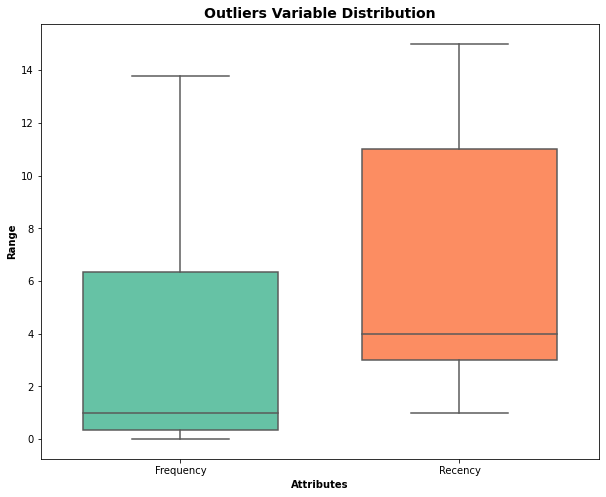

In [ ]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [ ]:
def to_num(Amount):
    if Amount=='Ash & Sludge' or Amount=='Ash and sludge':
        return 0.0
    elif Amount=='C&D':
        return 1.0
    elif Amount=='Construction Debris' or Amount=='Construction debris':
        return 2.0
    elif Amount=='Ferrous Metal' or Amount=='Ferrous Metals' or Amount=='Ferrous metal':
        return 3.0
    elif Amount=='Food':
        return 4.0
    elif Amount=='Food waste':
        return 5.0
    elif Amount=='Glass':
        return 6.0
    elif Amount=='Horticultural Waste' or Amount=='Horticultural waste':
        return 7.0
    elif Amount=='Non-ferrous Metals' or Amount=='Non-ferrous metal' or Amount=='Non-ferrous metals':
        return 8.0
    elif Amount=='Others':
        return 9.0
    elif Amount=='Others (stones, ceramic, rubber, etc.)' or Amount=='Others (stones, ceramics & rubber etc)' or Amount=='Others (stones, ceramics & rubber etc.)':
        return 10.0
    elif Amount=='Paper/Cardboard':
        return 11.0   
    elif Amount=='Plastic' or Amount=='Plastics':
        return 12.0
    elif Amount=='Scrap Tyres' or Amount=='Scrap tyres':
        return 13.0
    elif Amount=='Sludge':
        return 14.0
    elif Amount=='Textile/Leather':
        return 15.0
    elif Amount=='Total':
        return 16.0
    elif Amount=='Used Slag' or Amount=='Used slag':
        return 17.0
    elif Amount=='Wood':
        return 18.0
    elif Amount=='Wood/Timber':
        return 19.0
    else:
        return category

rfm['Amount'] = rfm['Amount'].apply(to_num)

In [ ]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

Rescaling the Attributes


Standardisation Scaling.

In [ ]:
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm = pd.merge(rfm_m, rfm_f, on='waste_type', how='inner')
rfm.head()

,waste_type,non recycling rate,Recency
0,Ash & Sludge,2.600796,3
1,Ash and sludge,0.882498,1
2,C&D,0.020024,3
3,Construction Debris,0.316872,11
4,Construction debris,0.005841,1


In [ ]:
rfm = pd.merge(rfm_m, rfm_f, on='waste_type', how='inner')
rfm.columns = ['Amount', 'Frequency', 'Recency']
rfm.head()

,Amount,Frequency,Recency
0,Ash & Sludge,2.600796,3
1,Ash and sludge,0.882498,1
2,C&D,0.020024,3
3,Construction Debris,0.316872,11
4,Construction debris,0.005841,1


Building the Model

In [ ]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 3, 0, 1, 1, 3, 3, 0, 0, 3], dtype=int32)

Finding the Optimal Number of Clusters

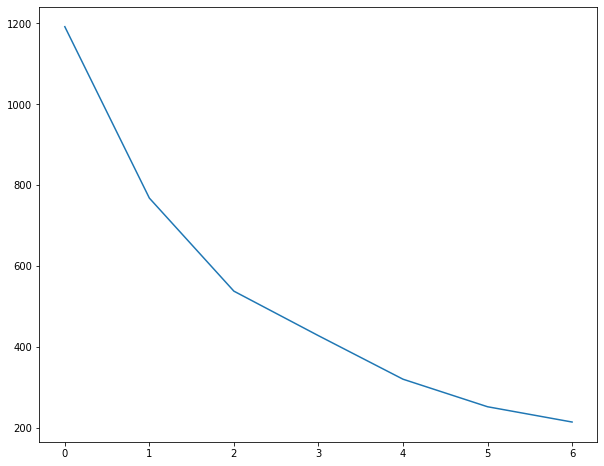

In [ ]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

Silhouette Analysis

In [ ]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.4447601392057149
For n_clusters=3, the silhouette score is 0.41602516205035756
For n_clusters=4, the silhouette score is 0.4137243232145137
For n_clusters=5, the silhouette score is 0.4168687138483976
For n_clusters=6, the silhouette score is 0.41782026108851233
For n_clusters=7, the silhouette score is 0.4069081288904667
For n_clusters=8, the silhouette score is 0.35704018837855345


In [ ]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
 kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 1], dtype=int32)

In [ ]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,Amount,Frequency,Recency,Cluster_Id
0,Ash & Sludge,2.600796,3,0
1,Ash and sludge,0.882498,1,0
2,C&D,0.020024,3,0
3,Construction Debris,0.316872,11,0
4,Construction debris,0.005841,1,0


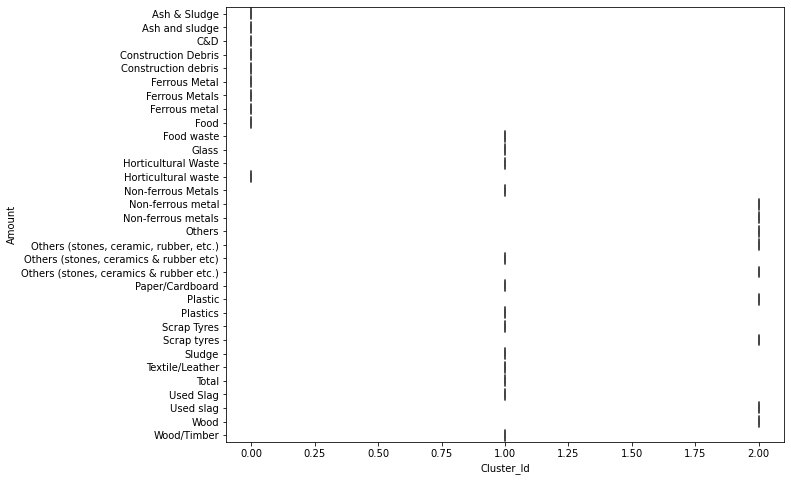

In [ ]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

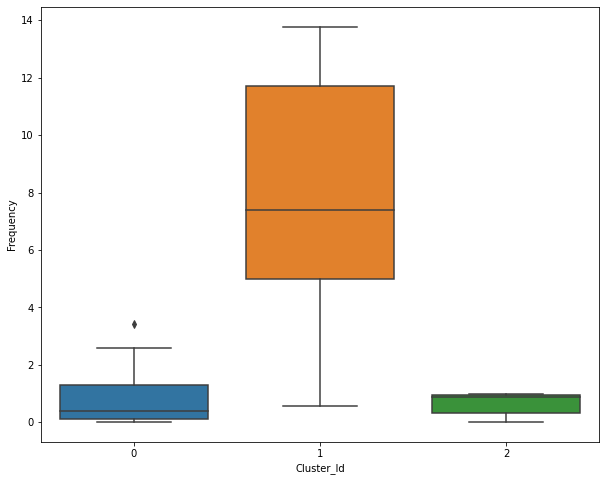

In [ ]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

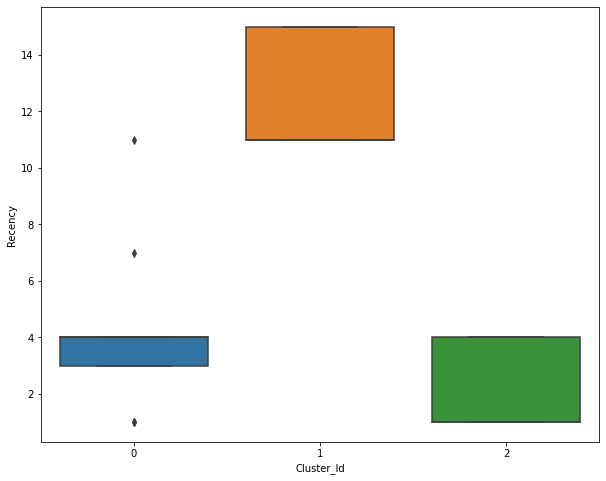

In [ ]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

hierarchical clustering

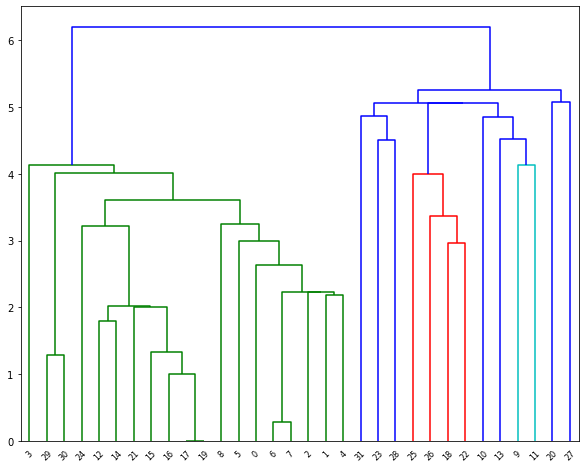

In [ ]:
# Single linkage: 

mergings = linkage(rfm_df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

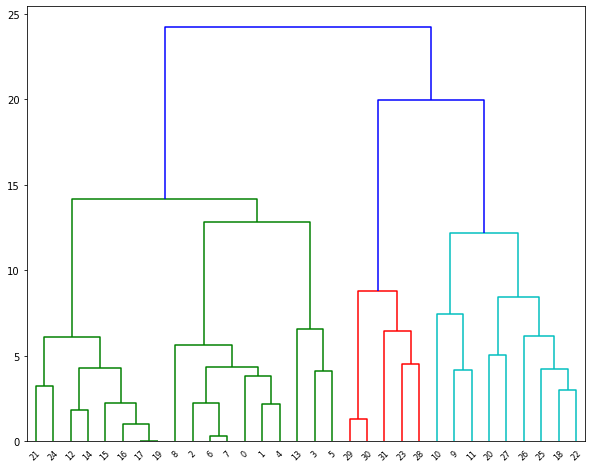

In [ ]:
# Complete linkage

mergings = linkage(rfm_df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

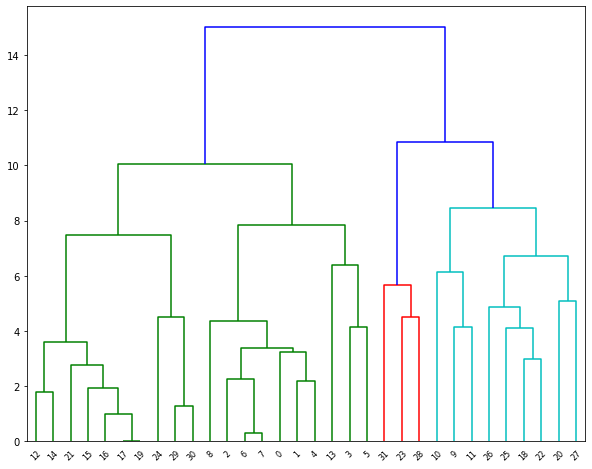

In [ ]:
# Average linkage

mergings = linkage(rfm_df, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

Cutting the Dendrogram based on K

In [ ]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 2, 0, 1, 1, 1, 2, 0, 0, 2])

In [ ]:
# Assign cluster labels

rfm['Cluster_Labels'] = cluster_labels
rfm.head()

,Amount,Frequency,Recency,Cluster_Id,Cluster_Labels
0,Ash & Sludge,2.600796,3,0,0
1,Ash and sludge,0.882498,1,0,0
2,C&D,0.020024,3,0,0
3,Construction Debris,0.316872,11,0,0
4,Construction debris,0.005841,1,0,0


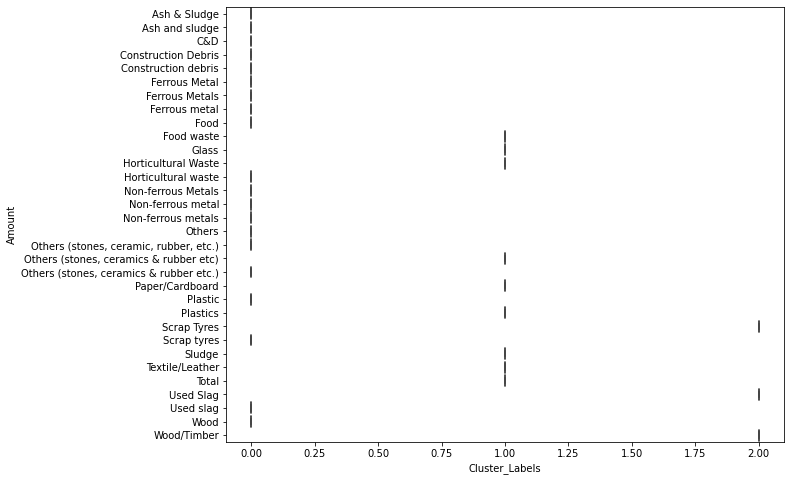

In [ ]:
# Plot Cluster Id vs Amount

sns.boxplot(x='Cluster_Labels', y='Amount', data=rfm)

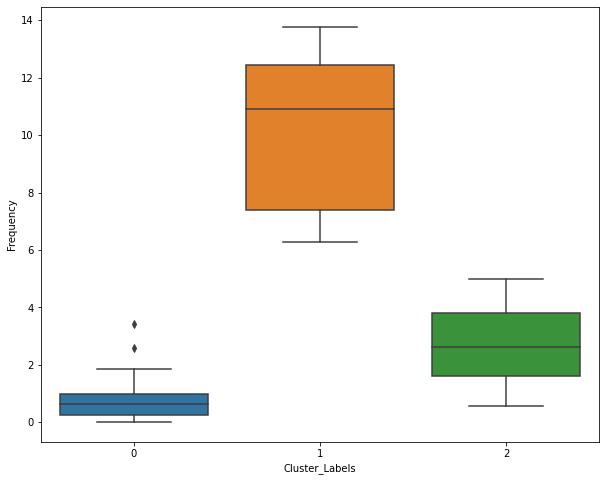

In [ ]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='Cluster_Labels', y='Frequency', data=rfm)

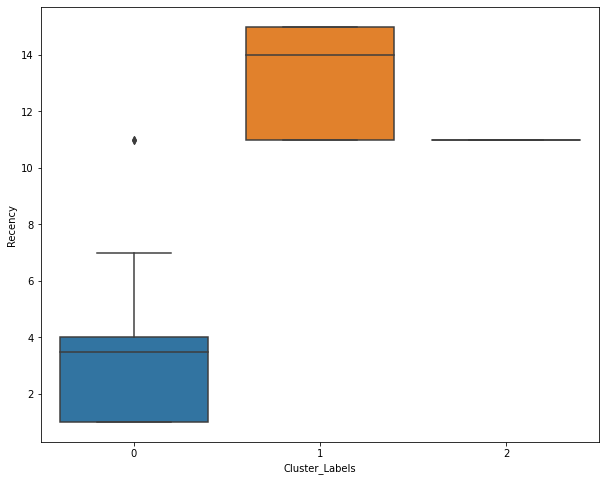

In [ ]:
# Plot Cluster Id vs Recency

sns.boxplot(x='Cluster_Labels', y='Recency', data=rfm)

Final Analysis

### Inference:
K-Means Clustering with 3 Cluster Ids
- Customers with Cluster Id 1 are the customers with high amount of transactions as compared to other customers.
- Customers with Cluster Id 1 are frequent buyers.
- Customers with Cluster Id 2 are not recent buyers and hence least of importance from business point of view.

Hierarchical Clustering with 3 Cluster Labels
- Customers with Cluster_Labels 2 are the customers with high amount of transactions as compared to other customers.
- Customers with Cluster_Labels 2 are frequent buyers.
- Customers with Cluster_Labels 0 are not recent buyers and hence least of importance from business point of view.